In [2]:
import pandas as pd 


In [3]:
aqi = pd.read_csv('aqi.csv')

In [4]:
aqi.head()

,date,state,area,number_of_monitoring_stations,prominent_pollutants,aqi_value,air_quality_status,unit,note
0,30-04-2025,Maharashtra,Amravati,2,PM10,78,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN
1,30-04-2025,Bihar,Purnia,1,CO,56,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN
2,30-04-2025,Madhya Pradesh,Katni,1,O3,98,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN
3,30-04-2025,Chhattisgarh,Tumidih,1,PM10,103,Moderate,number_of_monitoring_stations in Absolute Numb...,NaN
4,30-04-2025,Assam,Byrnihat,1,PM2.5,61,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN


In [5]:
aqi.columns

Index(['date', 'state', 'area', 'number_of_monitoring_stations',
       'prominent_pollutants', 'aqi_value', 'air_quality_status', 'unit',
       'note'],
      dtype='object')

AQI Dataset we have 9 column 
- Data: Contain date 
- State: State of the india
- Area: Area of the state
- Number_of_monitoring_stations: How many state are monitoring the stations i think 
- prominent_pollutants: I don't know i have look at the column 
- aqi_value: Don't know again i have to gain information related to this 
- air_quality_status: State of the air quality [`Satisfactory`, `Moderate`, `Good`, `Poor`, `Very Poor`, `Severe`]
- unit: Don't know i have to research about it. 
- note: Only NaN values. I will drop it. 

In [11]:
aqi.shape

(235785, 9)

In [10]:
aqi.isnull().sum()

date                                  0
state                                 0
area                                  0
number_of_monitoring_stations         0
prominent_pollutants                  0
aqi_value                             0
air_quality_status                    0
unit                                  0
note                             235785
dtype: int64

In out data set don't have null values except note. 

Without a second though i'll drop the note column

In [13]:
aqi.drop(columns='note', inplace=True)

In [31]:
aqi.head()


,date,state,area,number_of_monitoring_stations,prominent_pollutants,aqi_value,air_quality_status,unit,month
0,2025-04-30,Maharashtra,Amravati,2,PM10,78,Satisfactory,number_of_monitoring_stations in Absolute Numb...,4
1,2025-04-30,Bihar,Purnia,1,CO,56,Satisfactory,number_of_monitoring_stations in Absolute Numb...,4
2,2025-04-30,Madhya Pradesh,Katni,1,O3,98,Satisfactory,number_of_monitoring_stations in Absolute Numb...,4
3,2025-04-30,Chhattisgarh,Tumidih,1,PM10,103,Moderate,number_of_monitoring_stations in Absolute Numb...,4
4,2025-04-30,Assam,Byrnihat,1,PM2.5,61,Satisfactory,number_of_monitoring_stations in Absolute Numb...,4


In [18]:
aqi.duplicated().sum()

np.int64(0)

In [21]:
aqi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235785 entries, 0 to 235784
Data columns (total 8 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   date                           235785 non-null  object
 1   state                          235785 non-null  object
 2   area                           235785 non-null  object
 3   number_of_monitoring_stations  235785 non-null  int64 
 4   prominent_pollutants           235785 non-null  object
 5   aqi_value                      235785 non-null  int64 
 6   air_quality_status             235785 non-null  object
 7   unit                           235785 non-null  object
dtypes: int64(2), object(6)
memory usage: 14.4+ MB


Here i found out few mistake 
First with date column 
- data: this is object type but it should be a datetime 


I'll convert date into datetime


In [22]:
aqi['date'] = pd.to_datetime(aqi['date'])


/var/folders/wg/8rqwg0nd7995t2tzgq40dsph0000gn/T/ipykernel_13183/754965097.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  aqi['date'] = pd.to_datetime(aqi['date'])


No dublicate are present inside our data

#### Let's start with Date

In [17]:
aqi['date'].isnull().sum()

np.int64(0)

In [24]:
aqi['date'].dt.month.value_counts()

date
4     24469
3     21017
12    20498
1     20151
11    20104
10    19900
2     18653
8     18536
9     18499
7     18303
5     18100
6     17555
Name: count, dtype: int64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

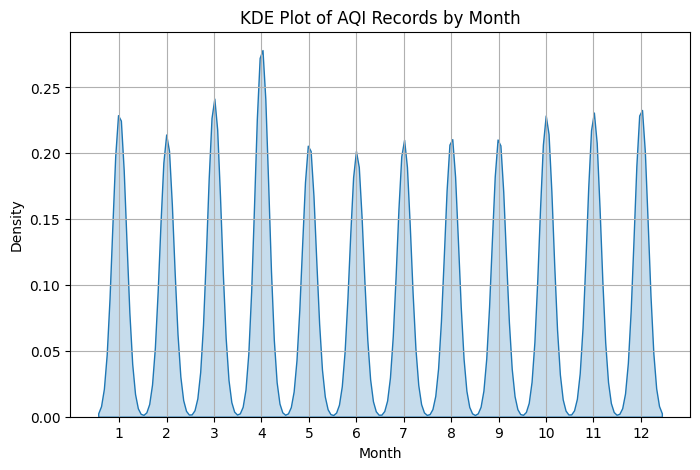

In [26]:
# Extract month
aqi['month'] = aqi['date'].dt.month

# KDE Plot of month distribution
plt.figure(figsize=(8, 5))
sns.kdeplot(aqi['month'], fill=True, bw_adjust=0.5)
plt.title('KDE Plot of AQI Records by Month')
plt.xlabel('Month')
plt.ylabel('Density')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
aqi['state'].value_counts()

state
Rajasthan                      26585
Karnataka                      23494
Maharashtra                    22459
Haryana                        21706
Uttar Pradesh                  21609
Bihar                          21553
Madhya Pradesh                 15477
Tamil Nadu                     11954
Odisha                         11099
Punjab                          8488
Andhra Pradesh                  7077
West Bengal                     6921
Gujarat                         6215
Kerala                          5574
Chhattisgarh                    5556
Assam                           4921
Uttarakhand                     2332
Delhi                           1125
Chandigarh                      1125
Telangana                       1125
Puducherry                      1070
Himachal Pradesh                1066
Tripura                         1035
Mizoram                         1000
Nagaland                         957
Meghalaya                        874
Sikkim                          

/var/folders/wg/8rqwg0nd7995t2tzgq40dsph0000gn/T/ipykernel_13183/4222349532.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_counts.index, y=state_counts.values, palette="viridis")


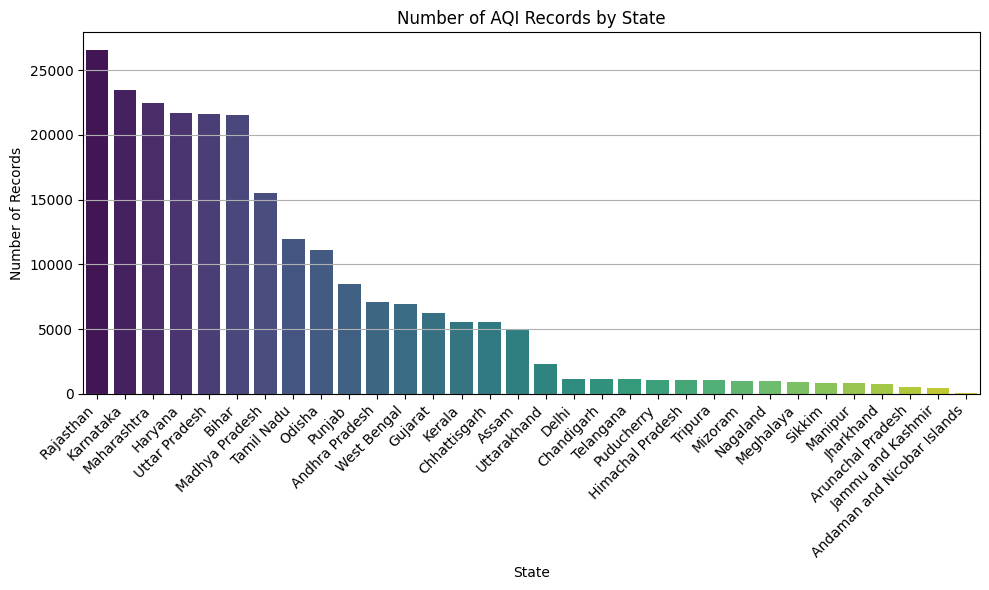

In [30]:
# Get count of records per state, sorted
state_counts = aqi['state'].value_counts().sort_values(ascending=False)

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=state_counts.index, y=state_counts.values, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.title('Number of AQI Records by State')
plt.xlabel('State')
plt.ylabel('Number of Records')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [32]:
aqi.columns

Index(['date', 'state', 'area', 'number_of_monitoring_stations',
       'prominent_pollutants', 'aqi_value', 'air_quality_status', 'unit',
       'month'],
      dtype='object')

### number_of_monitoring_stations
#### Explanation in AQI Terms

##### 1. Monitoring Station:
A **monitoring station** is a setup with sensors and equipment to measure pollutants like:

- PM2.5  
- PM10  
- NO₂  
- CO  
- SO₂  
- O₃  

These stations are typically managed by environmental authorities like **CPCB (India)** or **EPA (USA)**.

---

##### 2. Why is `number_of_monitoring_stations` important?

###### (a) Data Accuracy:
- More stations = more data points = better accuracy in AQI calculation.
- A city with **1 station** may not capture pollution spread as well as one with **10 stations**.

###### (b) Geographical Coverage:
- Higher count = better **area coverage**.
- Helps capture **localized pollution spikes** (e.g., near highways, factories).

###### (c) Reliability of AQI:
- An AQI derived from **multiple stations** is considered more **representative** of overall air quality.


In [36]:
aqi['number_of_monitoring_stations'].value_counts()

number_of_monitoring_stations
1     181527
2      16442
3      15039
4       8066
6       4871
5       2435
7       2070
8        936
9        496
12       419
13       400
11       395
10       366
36       214
37       177
38       175
14       171
35       150
17       127
24       126
18       123
34       105
19       105
23       102
25        82
22        78
39        72
33        66
16        65
20        64
26        56
21        51
15        43
32        40
31        36
27        31
28        25
30        19
29        18
40         2
Name: count, dtype: int64

### Explanation of `prominent_pollutants` in AQI

#### 📌 What is a Prominent Pollutant?
- A **prominent pollutant** is the **main pollutant** contributing the most to the Air Quality Index (AQI) at a given location and time.
- It is the **dominant factor** in determining the AQI value.

---

#### 🧪 Common Prominent Pollutants:
These are typically measured in AQI systems:

- **PM2.5** – Fine particulate matter (less than 2.5 microns)
- **PM10** – Coarse particulate matter (less than 10 microns)
- **NO₂** – Nitrogen dioxide
- **SO₂** – Sulfur dioxide
- **CO** – Carbon monoxide
- **O₃** – Ground-level ozone
- **NH₃** – Ammonia
- **Pb** – Lead

---

#### 📊 How Is It Determined?
- At any given time, AQI is calculated for **each pollutant**.
- The pollutant with the **highest AQI sub-index** is tagged as the **`prominent_pollutant`**.

---

#### 📍 Why Is It Important?

- Helps identify the **key cause of pollution** in a location.
- Useful for **policy-making** (e.g., restricting vehicles if NO₂ is prominent).
- Helps individuals take **precautions** based on specific pollutants (e.g., masks for PM2.5, avoiding outdo


In [39]:
aqi['prominent_pollutants'].value_counts()

prominent_pollutants
PM10                 111053
PM2.5                 59670
O3                    16202
PM2.5,PM10            13199
CO                    12867
PM10,O3                3914
SO2                    3815
NO2                    3012
PM10,CO                2658
PM2.5,O3               2088
PM10,NO2               1278
O3,PM2.5,PM10          1019
PM2.5,PM10,CO           710
PM10,SO2                551
CO,O3                   543
PM10,O3,CO              418
PM2.5,NO2               415
PM10,PM2.5,NO2          281
PM2.5,SO2               278
CO,NO2                  274
PM10,NO2,O3             216
NO2,PM10,CO             191
CO,SO2                  167
NO2,O3                  139
PM10,PM2.5,SO2          111
SO2,O3                  109
PM2.5,CO,O3              99
PM10,CO,SO2              69
NH3                      69
PM10,SO2,O3              65
NO2,CO,O3                49
PM10,NO2,PM2.5,O3        43
PM2.5,CO,NO2             40
PM2.5,CO,SO2             36
NO2,SO2                  34

In [40]:
# Split and explode
aqi_exploded = aqi.assign(pollutant=aqi['prominent_pollutants'].str.split(',')).explode('pollutant')

# Count frequencies
pollutant_counts = aqi_exploded['pollutant'].value_counts()


In [42]:
aqi_exploded

,date,state,area,number_of_monitoring_stations,prominent_pollutants,aqi_value,air_quality_status,unit,month,pollutant
0,2025-04-30,Maharashtra,Amravati,2,PM10,78,Satisfactory,number_of_monitoring_stations in Absolute Numb...,4,PM10
1,2025-04-30,Bihar,Purnia,1,CO,56,Satisfactory,number_of_monitoring_stations in Absolute Numb...,4,CO
2,2025-04-30,Madhya Pradesh,Katni,1,O3,98,Satisfactory,number_of_monitoring_stations in Absolute Numb...,4,O3
3,2025-04-30,Chhattisgarh,Tumidih,1,PM10,103,Moderate,number_of_monitoring_stations in Absolute Numb...,4,PM10
4,2025-04-30,Assam,Byrnihat,1,PM2.5,61,Satisfactory,number_of_monitoring_stations in Absolute Numb...,4,PM2.5
...,...,...,...,...,...,...,...,...,...,...
235781,2022-04-01,Rajasthan,Jaipur,3,"PM2.5,PM10",158,Moderate,number_of_monitoring_stations in Absolute Numb...,4,PM2.5
235781,2022-04-01,Rajasthan,Jaipur,3,"PM2.5,PM10",158,Moderate,number_of_monitoring_stations in Absolute Numb...,4,PM10
235782,2022-04-01,Maharashtra,Chandrapur,2,PM2.5,201,Poor,number_of_monitoring_stations in Absolute Numb...,4,PM2.5
235783,2022-04-01,Uttar Pradesh,Varanasi,4,PM10,128,Moderate,number_of_monitoring_stations in Absolute Numb...,4,PM10


### What is `aqi_value`?

- `aqi_value` stands for **Air Quality Index (AQI)** value.
- It is a **numerical score** that represents the **overall level of air pollution** at a specific time and location.

---

### 📏 AQI Value Scale (India – CPCB Standard):

| AQI Value Range | AQI Category     | Health Impact                          |
|------------------|------------------|----------------------------------------|
| 0 – 50           | Good             | Minimal impact                         |
| 51 – 100         | Satisfactory     | Minor breathing discomfort             |
| 101 – 200        | Moderate         | Breathing discomfort for sensitive groups |
| 201 – 300        | Poor             | Breathing issues for people with lungs or heart conditions |
| 301 – 400        | Very Poor        | Respiratory illness on prolonged exposure |
| 401 – 500        | Severe           | Affects healthy people and seriously impacts sensitive groups |

> 📌 `aqi_value` is often derived from the **prominent pollutant**'s sub-index.

---

### 🧪 How is `aqi_value` Calculated?

- AQI is calculated from **pollutant concentration levels** such as PM2.5, PM10, NO₂, etc.
- The **highest sub-index** among these pollutants determines the **final `aqi_value`**.
- Formulae and breakpoints are defined by environmental agencies (e.g., CPCB in India).

---

### 📊 Example:

If at a given time, pollutant sub-index values are:

- PM2.5 = 180  
- PM10 = 120  
- O₃ = 90  

Then:

```python
aqi_value = 180
prominent_pollutant = 'PM2.5'
aqi_category = 'Moderate'


In [44]:
aqi['aqi_value'].value_counts()

aqi_value
46     2593
50     2535
58     2293
48     2260
62     2197
       ... 
466       1
478       1
488       1
458       1
464       1
Name: count, Length: 472, dtype: int64

In [45]:
aqi.columns

Index(['date', 'state', 'area', 'number_of_monitoring_stations',
       'prominent_pollutants', 'aqi_value', 'air_quality_status', 'unit',
       'month'],
      dtype='object')

### air_quality_status
I do belive that because of previous explaintion you get what is air_quality_status


In [46]:
aqi['air_quality_status'].value_counts()

air_quality_status
Satisfactory    88897
Moderate        77537
Good            41971
Poor            21154
Very Poor        5671
Severe            555
Name: count, dtype: int64

In [50]:
aqi['unit'][0]

'number_of_monitoring_stations in Absolute Number, aqi_value in Indices'

In [53]:
for i in range(5):
    print(aqi['unit'][i])

number_of_monitoring_stations in Absolute Number, aqi_value in Indices
number_of_monitoring_stations in Absolute Number, aqi_value in Indices
number_of_monitoring_stations in Absolute Number, aqi_value in Indices
number_of_monitoring_stations in Absolute Number, aqi_value in Indices
number_of_monitoring_stations in Absolute Number, aqi_value in Indices


In [54]:
aqi['unit'].value_counts()

unit
number_of_monitoring_stations in Absolute Number, aqi_value in Indices    235785
Name: count, dtype: int64

In [55]:
aqi.drop(columns=['unit'], inplace=True)


In [56]:
aqi.head()

,date,state,area,number_of_monitoring_stations,prominent_pollutants,aqi_value,air_quality_status,month
0,2025-04-30,Maharashtra,Amravati,2,PM10,78,Satisfactory,4
1,2025-04-30,Bihar,Purnia,1,CO,56,Satisfactory,4
2,2025-04-30,Madhya Pradesh,Katni,1,O3,98,Satisfactory,4
3,2025-04-30,Chhattisgarh,Tumidih,1,PM10,103,Moderate,4
4,2025-04-30,Assam,Byrnihat,1,PM2.5,61,Satisfactory,4
